In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 1: Install required packages (if not already installed)
!pip install scikit-image opencv-python-headless

In [3]:
# Step 2: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology
import os

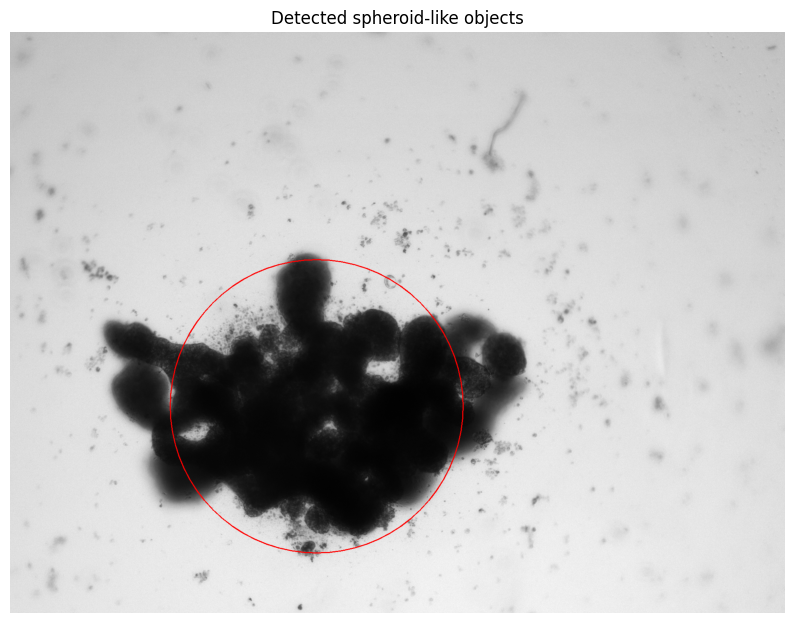

In [12]:
# Step 3: Define path to image on Google Drive
# Change this to your actual file path inside My Drive
image_path = "/content/drive/MyDrive/OneDrive_1_6-24-2025/Day 7 vub19-1Q_Plate_R_p00_0_D11f00d4.TIF"
# Step 4: Load 16-bit TIFF and normalize to 8-bit
img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
if img is None:
    raise ValueError("Image not found. Check the file path.")
img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Step 5: Preprocess - Gaussian blur
blurred = cv2.GaussianBlur(img_norm, (11, 11), 0)

# Step 6: Thresholding with Otsu (invert to detect dark structures)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 7: Morphological cleanup
clean = morphology.remove_small_objects(thresh.astype(bool), min_size=500)
clean = morphology.binary_closing(clean, morphology.disk(5))

# Step 8: Label connected components and analyze
labels = measure.label(clean)
props = measure.regionprops(labels)

# Step 9: Draw circles around spheroid-like objects
output_img = cv2.cvtColor(img_norm, cv2.COLOR_GRAY2BGR)
for prop in props:
    if prop.area > 1000 and prop.eccentricity < 0.9:
        y0, x0 = prop.centroid
        radius = prop.equivalent_diameter / 2
        cv2.circle(output_img, (int(x0), int(y0)), int(radius), (0, 0, 255), 2)  # Red circles

# Step 10: Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title("Detected spheroid-like objects")
plt.axis("off")
plt.show()
